# Data Explore: How many active firms per month

## Github issue: https://github.com/herbsh/solar_project/issues/5

In [1]:
import pandas as pd 

In [2]:
data=pd.read_stata("../3_output/regression_analysis_ind_with_ent_sent_june2020.dta")

In [3]:
data.head()

,avg,avg_sent_score,five,four,installer_id,market,one,quotes_count,reviews_ct,three,...,text_d_others_mean,text_d_others_std,text_d_others_min,text_d_others_p25,text_d_others_p50,text_d_others_p75,text_d_others_max,missing_avg_sent,missing_avg_sent_others,missing_avg_sent_mkt
0,NaN,0.0,0,0,108,2,0,27,0,0,...,0.155801,0.124445,0.043928,0.077625,0.099651,0.138043,0.424565,1.0,0.0,0.0
1,NaN,0.0,0,0,108,2,0,0,0,0,...,0.155801,0.124445,0.043928,0.077625,0.099651,0.138043,0.424565,1.0,0.0,0.0
2,NaN,0.0,0,0,108,2,0,0,0,0,...,0.146737,0.095365,0.040738,0.089288,0.122641,0.152239,0.441533,1.0,0.0,0.0
3,NaN,0.0,0,0,108,2,0,0,0,0,...,0.146737,0.095365,0.040738,0.089288,0.122641,0.152239,0.441533,1.0,0.0,0.0
4,NaN,0.0,0,0,108,2,0,0,0,0,...,0.136422,0.093985,0.032452,0.080836,0.115074,0.144480,0.441533,1.0,0.0,0.0


In [4]:
data['ent_mkt'].describe()

count    5340.000000
mean        0.237622
std         0.185722
min         0.000000
25%         0.139061
50%         0.237177
75%         0.314123
max         1.054920
Name: ent_mkt, dtype: float64

In [5]:
data['ent_self'].describe()

count    5340.000000
mean        0.098142
std         0.219968
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.209574
Name: ent_self, dtype: float64

In [6]:
data.columns

Index(['avg', 'avg_sent_score', 'five', 'four', 'installer_id', 'market',
       'one', 'quotes_count', 'reviews_ct', 'three', 'two',
       'winning_quotes_count', 'year_month_count', 'avgmean_mkt',
       'avgmean_others', 'avg_sent_score_mkt', 'avg_sent_score_others',
       'ent_mkt', 'ent_others', 'ent_self', 'state', 'since', 'unnamed0',
       'month', 'year', 'zipcode_total_rev', 'own_price', 'other_prices',
       'log_quotes', 'experience', 'state_n', 'log_experience',
       'temp_own_price_diff_other', 'missing_price_info', 'avg_v2',
       'missing_avg', 'log_zip_rev', 'text_d_mkt_mean', 'text_d_mkt_std',
       'text_d_mkt_min', 'text_d_mkt_p25', 'text_d_mkt_p50', 'text_d_mkt_p75',
       'text_d_mkt_max', 'text_d_self_mean', 'text_d_self_std',
       'text_d_self_min', 'text_d_self_p25', 'text_d_self_p50',
       'text_d_self_p75', 'text_d_self_max', 'text_d_others_mean',
       'text_d_others_std', 'text_d_others_min', 'text_d_others_p25',
       'text_d_others_p50', 't

In [7]:
set(data.year_month_count)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64}

In [8]:
temp=[]
for m in set(data.year_month_count):
    data=data[data['ent_others']>=0]
    data_month=data[data['year_month_count']==m][['installer_id','quotes_count']]
    active_thismonth=len(data_month[data_month['quotes_count']>1].installer_id.unique())
    print(m,active_thismonth)
    temp.append([m,active_thismonth])
df_activefirms=pd.DataFrame(data=temp,columns=['month','active_thismonth'])

     

1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 1
10 1
11 1
12 1
13 2
14 3
15 3
16 3
17 4
18 2
19 5
20 7
21 6
22 7
23 5
24 8
25 10
26 18
27 16
28 20
29 20
30 26
31 25
32 25
33 38
34 41
35 43
36 48
37 44
38 59
39 68
40 67
41 80
42 97
43 118
44 119
45 112
46 124
47 128
48 125
49 135
50 131
51 141
52 145
53 149
54 157
55 156
56 156
57 151
58 170
59 166
60 159
61 174
62 178
63 181
64 141


In [9]:
df_activefirms.describe()

,month,active_thismonth
count,64.000000,64.00000
mean,32.500000,62.81250
std,18.618987,65.19662
min,1.000000,0.00000
25%,16.750000,3.00000
50%,32.500000,32.00000
75%,48.250000,128.75000
max,64.000000,181.00000


In [10]:
temp=[]
for m in set(data.year_month_count):
    data=data[data['ent_others']>=0]
    data_month=data[data['year_month_count']==m][['installer_id','quotes_count']]
    active_thismonth=len(data_month[data_month['quotes_count']>2].installer_id.unique())
    #print(m,active_thismonth)
    temp.append([m,active_thismonth])
df_activefirms_2=pd.DataFrame(data=temp,columns=['month','active_thismonth'])
df_activefirms_2.describe()
     

,month,active_thismonth
count,58.000000,58.000000
mean,35.500000,64.637931
std,16.886879,62.012647
min,7.000000,0.000000
25%,21.250000,5.000000
50%,35.500000,38.000000
75%,49.750000,126.750000
max,64.000000,173.000000


In [11]:
df_activefirms_2

,month,active_thismonth
0,7,0
1,8,0
2,9,1
3,10,1
4,11,1
5,12,1
6,13,1
7,14,1
8,15,2
9,16,2


In [12]:
data.head()

,avg,avg_sent_score,five,four,installer_id,market,one,quotes_count,reviews_ct,three,...,text_d_others_mean,text_d_others_std,text_d_others_min,text_d_others_p25,text_d_others_p50,text_d_others_p75,text_d_others_max,missing_avg_sent,missing_avg_sent_others,missing_avg_sent_mkt
10,NaN,0.0000,0,0,363,6,0,8,0,0,...,0.172699,0.036664,0.091618,0.140838,0.169296,0.202496,0.236393,1.0,0.0,0.0
11,5.0,0.7902,1,0,363,6,0,94,1,0,...,0.172699,0.036664,0.091618,0.140838,0.169296,0.202496,0.236393,0.0,0.0,0.0
12,5.0,0.7902,1,0,363,6,0,26,1,0,...,0.166570,0.037324,0.091618,0.136821,0.167101,0.194658,0.236393,0.0,0.0,0.0
13,5.0,0.5757,2,0,363,6,0,113,2,0,...,0.157315,0.041055,0.063183,0.128512,0.161736,0.181910,0.236393,0.0,0.0,0.0
14,5.0,0.5757,2,0,363,6,0,115,2,0,...,0.157315,0.041055,0.063183,0.128512,0.161736,0.181910,0.236393,0.0,0.0,0.0


## What's the average active duration? 

In [14]:
data[['installer_id','year_month_count','quotes_count']].head()

,installer_id,year_month_count,quotes_count
10,363,40,8
11,363,41,94
12,363,42,26
13,363,43,113
14,363,44,115


In [15]:
data_active=data[['installer_id','year_month_count','quotes_count']]

In [17]:
data_active=data_active[data_active['quotes_count']>0]

In [18]:
data_active.describe()

,installer_id,year_month_count,quotes_count
count,4412.000000,4412.000000,4412.000000
mean,18755.607888,50.174524,48.886446
std,6185.413966,10.103832,107.119133
min,363.000000,7.000000,1.000000
25%,20358.000000,44.000000,5.000000
50%,21091.000000,52.000000,15.000000
75%,21451.250000,58.000000,46.000000
max,23027.000000,64.000000,1417.000000


In [19]:
temp=[]
for installer in set(data_active.installer_id):
    installer_record=data_active[data_active['installer_id']==installer]
    active_count=len(installer_record)
    temp.append([installer,active_count ])
df_active_duration=pd.DataFrame(data=temp,columns=['installer_id','active_count_months'])
df_active_duration.describe()     

,installer_id,active_count_months
count,364.000000,364.000000
mean,19547.920330,12.120879
std,5735.387951,9.754942
min,363.000000,1.000000
25%,20586.000000,4.000000
50%,21356.500000,9.000000
75%,21848.750000,18.000000
max,23027.000000,48.000000


## Histogram of active months count 

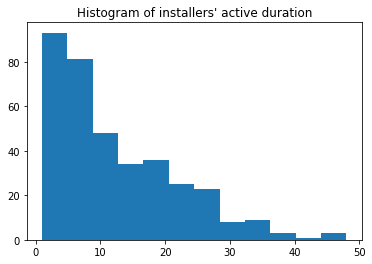

In [25]:
import matplotlib.pyplot as plt 

_ = plt.hist(df_active_duration.active_count_months, bins='auto') 
plt.title("Histogram of installers' active duration")
plt.savefig('histgram_activemonths_count')
plt.show()